## Importar librerías

1. Importe las librerías necesarias para utilizar matplotlib, numpy, pandas, sklearn y tensorflow. 

   *  *tensorflow as tf*
   *  *seaborn as sns*
   *  *pandas as pd*
   *  *numpy as np*
   *  *matplotlib pyplot as plt*
   *  *sklearn metrics*











In [0]:
from __future__ import print_function

import glob
import math
import os

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics


from IPython import display
from matplotlib import cm
from matplotlib import gridspec

#code


from tensorflow.python.data import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

## Leer el archivo de datos, agregar nombres de columnas y aleatorizar

1. Lea el archivo de datos del repositorio https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data, colóquelo en *iris_dataframe* como un pandas dataframe.

2. El archivo de datos no incluye los nombres de las columnas. 
Debe agregar los nombres correspondientes a las columnas del pandas dataframe. * sepal_lenght, sepal_width, petal_length, petal_widh, class.*

3. Recuerde aleatorizar el orden de las filas del dataframe.

4. Muestre las primeras 5 filas del dataframe.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html



In [187]:
iris_dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", sep=",", header=None)

iris_dataframe.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

iris_dataframe = iris_dataframe.reindex(
    np.random.permutation(iris_dataframe.index))


#code
iris_dataframe.head()


,sepal_length,sepal_width,petal_length,petal_width,class
79,5.7,2.6,3.5,1.0,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
112,6.8,3.0,5.5,2.1,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Número de filas en el dataframe
1. Muestre un sumario del dataframe y observe que el dataframe contiene 150 ejemplos.


In [188]:
l = iris_dataframe.describe()
l


,sepal_length,sepal_width,petal_length,petal_width
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


## Label categórico

Observe que la columna *class* tiene atributos categóricos, para hacer la predicción de las etiquetas debe codificarlas con valores numéricos.

Para este ejercicio utilizaremos una codificación numérica simple, asignando un entero entre 0 y el número de clases -1.

Para esta tarea use la clase LabelEncoder de Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

1. Agregue una columna adicional al dataframe *iris_dataframe* llamada *class_encoded* que contenga un numero entero que mapee cada clase de la columna *class*

2. Muestre los primeros 5 ejemplos del dataframe



In [0]:



#sns.FacetGrid(iris_dataframe, 
#    hue="class").map(plt.scatter, "petal_length", "petal_width").add_legend()

#le = LabelEncoder()
#le.fit(labels)

# apply encoding to labels
#labels = le.transform(labels)
#iris_dataframe['class_encoded'] = labels
#iris_dataframe.head()
#code
label_encoder = LabelEncoder()
label_encoder.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

iris_dataframe["class_encoded"] = label_encoder.transform(iris_dataframe["class"])
#code



## Normalización, Min-Max scaling

Cree una función que reciba una característica y devuelva la misma columna con todos los valores normalizados


1. Escriba el código que normaliza una feature con Min-Max scaling. https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

2. Envíe las primeras 4 columnas (features) a la función feature_normalization(feature) para que sean normalizadas.





In [0]:

def feature_normalization(feature):

# feature normalization
#DEFINE INDEX FIRST

  s =iris_dataframe.describe()
  #SEPAL LENGTH MIN AND MAX
  sepal_length_the_min =l['sepal_length']['min']
  sepal_length_the_max = l['sepal_length']['max']
    #SEPAL WIDTH MIN AND MAX
  sepal_width_the_min =l['sepal_width']['min']
  sepal_width_the_max = l['sepal_width']['max']
  #PETAL LENGTH MIN AND MAX
  petal_length_the_min =l['petal_length']['min']
  petal_length_the_max = l['petal_length']['max']
  #PETAL  WIDTH MIN AND MAX
  petal_width_the_min =l['petal_width']['min']
  petal_width_the_max = l['petal_width']['max']
  #GENERAR UNA COPIA DE FEATURE
  feature2 = feature.copy()
  #normalizar sepal_length
  feature2.loc[feature.index[0],'sepal_length'] = (feature2.loc[feature.index[0],'sepal_length'] - sepal_length_the_min)/(sepal_length_the_max - sepal_length_the_min)
  #normalizar sepal_width
  feature2.loc[feature.index[0],'sepal_width'] = (feature2.loc[feature.index[0],'sepal_width'] - sepal_width_the_min)/(sepal_width_the_max - sepal_width_the_min)
  #normalizar petal_length
  feature2.loc[feature.index[0],'petal_length']=(feature2.loc[feature.index[0],'petal_length']- petal_length_the_min)/(petal_length_the_max - petal_length_the_min)
  #normalizar petal_width
  feature2.loc[feature.index[0],'petal_width']=(feature2.loc[feature.index[0],'petal_width']- petal_width_the_min)/(petal_width_the_max - petal_width_the_min)
  return feature2
  

for x in range(0, iris_dataframe.shape[0]):
  iris_dataframe[x:x+1]=feature_normalization(iris_dataframe[x:x+1])
  




3. muestre un sumario del dataframe y observe que los valores máximos de cada feature deben ser 1.0 y los valores mínimos 0.0 esto nos indica que las features fueron normalizadas correctamente.

In [192]:
#code
iris_dataframe.describe()


,sepal_length,sepal_width,petal_length,petal_width,class_encoded
count,150.0,150.0,150.0,150.0,150.0
mean,0.4,0.4,0.5,0.5,1.0
std,0.2,0.2,0.3,0.3,0.8
min,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.3,0.1,0.1,0.0
50%,0.4,0.4,0.6,0.5,1.0
75%,0.6,0.5,0.7,0.7,2.0
max,1.0,1.0,1.0,1.0,2.0


## Labes and Features

Esta función devuelve dos objetos, una serie de pandas con las etiquetas, y un dataframe con las 4 características.

1. complete el código para que *labels* contenga las etiquetas codificadas.
2. complete el código para que features contenga las un dataframe con las 4 etiquetas. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html


In [0]:
def parse_labels_and_features(dataset):
  """Extracts labels and features. 
  Args:
    dataset: A Pandas `Dataframe`, containing the label on the fourth column, the encoded label on fifth column and
    sepal length,sepal width,petal length and petal width
      cm values on the 0 to 3 columns
  Returns:
    A `tuple` `(labels, features)`:
      labels: A Pandas `Series`.
      features: A Pandas `DataFrame`.
  """
  #data2 = dataset.copy()
  #labels =  data2.loc[:,'class_encoded']
  
  #features = data2.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
  
  #return labels, features
  labels = dataset[['class_encoded']]
  labels = labels.copy()
               
  features = pd.DataFrame(data={'sepal_length': dataset["sepal_length"], 'sepal_width': dataset["sepal_width"], 'petal_length': dataset["petal_length"], 'petal_width': dataset["petal_width"]})    
  features = features.copy()
  return labels, features

## Training, validation and test set

debe crear la separación para cada uno de los sets, tomando un porcentaje de ejemplos adecuado para cada uno. 

1. Utilice la función parse_labels_and_features(dataset), para crear el conjunto de entrenamiento, con sus respectivas etiquetas y ejemplos.

2. Muestre un sumario para observar la cantidad de ejemplos de entrenamiento.


In [194]:
training_targets, training_examples = parse_labels_and_features(iris_dataframe.head(90))
#code
training_examples.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,90.0,90.0,90.0,90.0
mean,0.5,0.4,0.5,0.5
std,0.2,0.2,0.3,0.3
min,0.0,0.0,0.0,0.0
25%,0.2,0.3,0.1,0.1
50%,0.4,0.4,0.6,0.5
75%,0.6,0.6,0.7,0.7
max,1.0,1.0,1.0,1.0


3. Utilice la función parse_labels_and_features(dataset), para crear el conjunto de validación, con sus respectivas etiquetas y ejemplos.

4. Muestre un sumario para observar la cantidad de ejemplos de validación.


In [195]:
validation_targets, validation_examples = parse_labels_and_features(iris_dataframe.iloc[90:120])

#code
validation_examples.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,30.0,30.0,30.0,30.0
mean,0.3,0.4,0.4,0.3
std,0.2,0.2,0.3,0.3
min,0.0,0.1,0.1,0.0
25%,0.2,0.3,0.1,0.0
50%,0.3,0.4,0.4,0.4
75%,0.4,0.5,0.6,0.6
max,0.7,0.9,0.8,1.0


5. Utilice la función parse_labels_and_features(dataset), para crear el conjunto de prueba, con sus respectivas etiquetas y ejemplos.

6. Muestre un sumario para observar la cantidad de ejemplos de prueba.


In [196]:
test_targets, test_examples = parse_labels_and_features(iris_dataframe.iloc[120:150])
test_examples.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,30.0,30.0,30.0,30.0
mean,0.5,0.4,0.5,0.5
std,0.2,0.1,0.3,0.3
min,0.0,0.2,0.0,0.0
25%,0.3,0.3,0.2,0.2
50%,0.5,0.4,0.6,0.6
75%,0.6,0.5,0.7,0.8
max,0.9,0.7,1.0,1.0


## Feature columns

Tensorflow necesita que indiquemos el tipo de feature que utilizaremos, en este ejercicio nuestras features serán de tipo numérico.

1. Complete el código para que la función devuelva un set con todas las features de entrada como tipo numérico. https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column


In [0]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])



## Input function


1. Complete el código para crear los batch del tamaño batch_size
Complete el código para que los datos sean repetidos al pasar un determinado número de epochs num_epochs
2. Complete el código para que pueda existir aleatorización al crear los batch si la variable shuffle es true
3. Complete el código para devolver el siguiente batch

https://www.tensorflow.org/api_docs/python/tf/data/Dataset


In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a neural network model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    
    #Batch size, repeat epochs
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

## Crear y entrenar el clasificador
1. Complete el codigo en las seccion #code y siga las instrucciones

In [0]:
def train_nn_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a neural network classification model for the Iris dataset.
  
  In addition to training, this function also prints training progress information,
  a plot of the training and validation loss over time, as well as a confusion
  matrix.
  
  Args:
    learning_rate: A `float`, the learning rate to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    training_examples: A `DataFrame` containing the training features.
    training_targets: A `DataFrame` containing the training labels.
    validation_examples: A `DataFrame` containing the validation features.
    validation_targets: A `DataFrame` containing the validation labels.
      
  Returns:
    The trained `DNNClassifier` object.
  """

  periods = 10
  # Caution: input pipelines are reset with each call to train. 
  # If the number of steps is small, your model may never see most of the data.  
  # So with multiple `.train` calls like this you may want to control the length 
  # of training with num_epochs passed to the input_fn. Or, you can do a really-big shuffle, 
  # or since it's in-memory data, shuffle all the data in the `input_fn`.
  steps_per_period = steps / periods


  # Create the input functions.

  #cree las funciones de entrada para las predicciones del set de validacion y entrenamiento

  predict_training_input_fn =lambda: my_input_fn(training_examples, 
                                                  training_targets, 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)

  #cree la funcion de entrada para el set de entrenamiento
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets['class_encoded'], 
                                          batch_size=batch_size)



  # Create a DNNClassifier object.

  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

  classifier = tf.estimator.DNNClassifier(
      feature_columns=construct_feature_columns(training_examples),
      n_classes=3,
      hidden_units=hidden_units,
      optimizer=my_optimizer,
      config=tf.contrib.learn.RunConfig(keep_checkpoint_max=1)
  )



  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss error (on validation data):")
  training_log_losses = []
  validation_log_losses = []

  for period in range (0, periods):


    # Train the model, starting from the prior state.

    #code entrene el modelo .train
    classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )

    # Take a break and compute probabilities.
    training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
    training_probabilities =np.array([item['probabilities'] for item in training_predictions])
    training_pred_class_id = np.array([item['class_ids'][0] for item in training_predictions])
    training_pred_one_hot=tf.keras.utils.to_categorical(training_pred_class_id,3)


    validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])  
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot=tf.keras.utils.to_categorical(validation_pred_class_id,3)

    training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
    validation_log_loss = metrics.log_loss(validation_targets,validation_pred_one_hot)



    # Compute training and validation errors.
    #training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
    #validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, validation_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)

  print("Model training finished.")

  # Calculate final predictions and probabilities  
  final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
  final_predictions = np.array([item['class_ids'][0] for item in final_predictions]) 
  #final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
  #final_probabilities = np.array([item['probabilities'] for item in final_predictions])
  #final_predictions = np.array([item['class_ids'][0] for item in final_predictions]) 


  accuracy = metrics.accuracy_score(validation_targets, final_predictions)
  print("Final accuracy (on validation data): %0.4f" % accuracy)

  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()
  plt.show()


  # Output a plot of the confusion matrix.
  cm = metrics.confusion_matrix(validation_targets, final_predictions)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r",xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

  return classifier



## Entrene el clasificador

Entrene el clasificador enviando los parámetros correspondientes a train_nn_classification_model. Recuerde que aquí puede colocar los hiperparametros que usted desee, debe encontrar los hiperparametros adecuados para lograr un buen accuracy en el test de validación, pero sin tener overfitting.


Training model...
LogLoss error (on validation data):
  period 00 : 11.51
  period 01 : 8.06
  period 02 : 9.21
  period 03 : 4.61
  period 04 : 2.30
  period 05 : 4.61
  period 06 : 2.30
  period 07 : 2.30
  period 08 : 3.45
  period 09 : 2.30
Model training finished.
Final accuracy (on validation data): 0.9333


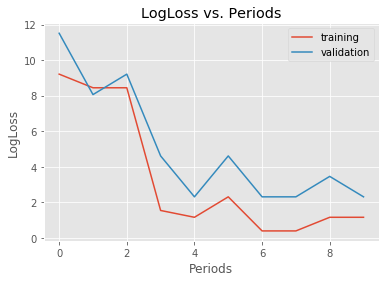

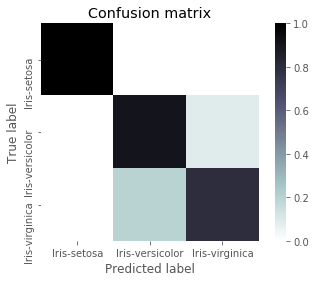

In [202]:

classifier = train_nn_classification_model(
             learning_rate=0.002,
             steps=1000,
             batch_size=10,
             hidden_units=[100, 100],
             training_examples=training_examples,
             training_targets=training_targets,
             validation_examples=validation_examples,
             validation_targets=validation_targets)

## Verificación en el conjunto de prueba

Verifique el accuracy en su test de prueba, recuerde que debe crear una función de entrada que no aleatoriza los batch y que solamente recorre los datos 1 época.

para medir el accuracy utilice https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


In [206]:
batch_size = 15
predict_test_input_fn = lambda: my_input_fn(test_examples, 
                                                  test_targets, 
                                                  num_epochs=1, 
                                                  shuffle=False) 
test_predictions = list(classifier.predict(input_fn=predict_test_input_fn))
test_predictions_class_id = np.array([item['class_ids'][0] for item in test_predictions])
test_predictions_probabilities = np.array([item['probabilities'] for item in test_predictions])

final_predictions = classifier.predict(input_fn=predict_test_input_fn)
  
final_predictions = np.array([item['class_ids'][0] for item in final_predictions]) 
  
accuracy = metrics.accuracy_score(test_targets, final_predictions) 
print("Accuracy on test data: %0.4f" % accuracy)



Accuracy on test data: 0.9333


In [207]:
test_targets_decoded = label_encoder.inverse_transform(test_targets)
test_predictions_decoded =  label_encoder.inverse_transform(test_predictions_class_id)


results_dataframe = pd.DataFrame()
results_dataframe['true_label'] = test_targets_decoded
results_dataframe['predicted_label'] = test_predictions_decoded

results_dataframe.head(30)
  

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,true_label,predicted_label
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-versicolor
...,...,...
25,Iris-versicolor,Iris-versicolor
26,Iris-setosa,Iris-setosa
27,Iris-versicolor,Iris-versicolor
28,Iris-virginica,Iris-virginica


In [0]:
def show_probabilities_graph(class_ids,probs,true_label):
  plt.rcdefaults()
  fig, ax = plt.subplots()

  y_pos = np.arange(len(class_ids))


  ax.barh(y_pos, probs, align='center', color='green', ecolor='black')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(class_ids)
  ax.invert_yaxis()  # labels read top-to-bottom
  ax.set_xlabel('Prob')
  ax.set_title('True label: '+true_label)

  plt.show()

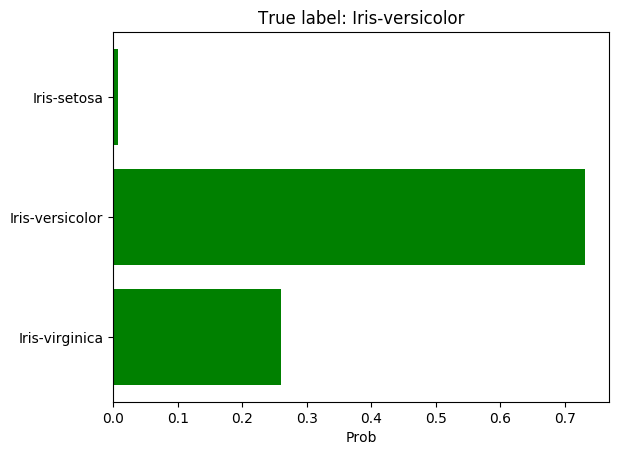

In [209]:
import random
i = random.randint(0,test_targets.size-1)

show_probabilities_graph(label_encoder.classes_,test_predictions_probabilities[i],str(test_targets_decoded[i]))
